In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
exams_df = pd.read_csv("exams.csv",
                      header=[0])
exams_df_no_outlier = exams_df.drop(6)
exams_df_no_outlier = exams_df_no_outlier.reset_index(drop=True)

In [3]:
exams_df

,midterm,final
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90
5,86,75
6,59,49
7,83,79
8,65,77
9,33,52


In [4]:
exams_df_no_outlier

,midterm,final
0,72,84
1,50,63
2,81,77
3,74,78
4,94,90
5,86,75
6,83,79
7,65,77
8,33,52
9,88,74


In [5]:
X = exams_df[['midterm']]
y = exams_df[['final']]
X_no_out = exams_df_no_outlier[['midterm']]
y_no_out = exams_df_no_outlier[['final']]

In [6]:
X = X.to_numpy()
y = y.to_numpy()
X_no_out = X_no_out.to_numpy()
y_no_out = y_no_out.to_numpy()

In [7]:
sns.set_theme(style='darkgrid')

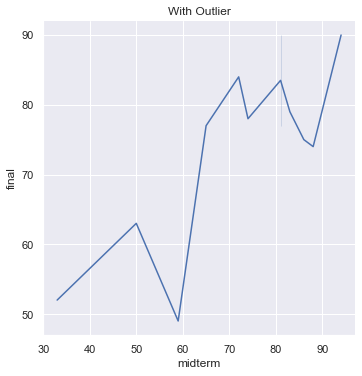

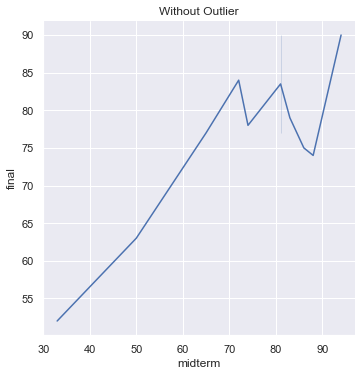

In [8]:
sns.relplot(data=exams_df,
           x=exams_df['midterm'],
           y=exams_df['final'],
           kind='line').set(title='With Outlier');
sns.relplot(data=exams_df_no_outlier,
           x=exams_df_no_outlier['midterm'],
           y=exams_df_no_outlier['final'],
           kind='line').set(title='Without Outlier');

In [9]:
## model with outlier 
reg = LinearRegression().fit(X, y)
## model with outlier 
reg_no_out = LinearRegression().fit(X_no_out, y_no_out)

In [10]:
## Predicting final score of 86
score_86 = np.array([86])
score_86_finals = reg.predict(score_86.reshape(-1,1))
score_86_finals

array([[82.04546774]])

In [11]:
## Predicting final score of 86, no outlier
score_86_no_out = np.array([86])
score_86_finals_no_out = reg_no_out.predict(score_86_no_out.reshape(-1,1))
score_86_finals_no_out

array([[82.65546312]])

In [12]:
## Generating preidctions
y_pred = reg.predict(X)
y_pred_no_out = reg_no_out.predict(X_no_out)

In [13]:
## Method of least squares equation
y_intercept = '%.2f' % reg.intercept_
midterms_score = '%.2f' % reg.coef_[0]
print('Final Score = ' + y_intercept + ' + ' + midterms_score + 'x')

FinalScore = 32.03 + 0.58x


In [14]:
## Method of least squares equation for no outlier
y_intercept_no_out = '%.2f' % reg_no_out.intercept_
midterms_score_no_out = '%.2f' % reg_no_out.coef_[0]
print('Final Score = ' + y_intercept_no_out + ' + ' + midterms_score_no_out + 'x')

FinalScore = 39.22 + 0.51x


In [15]:
## With outlier final table
exams_pred_df = pd.concat([exams_df, pd.DataFrame(y_pred)],axis=1)
exams_pred_df.columns = ['midterm', 'final', 'predicted']
exams_pred_df

,midterm,final,predicted
0,72,84,73.903067
1,50,63,61.107865
2,81,77,79.137467
3,74,78,75.066267
4,94,90,86.698268
5,86,75,82.045468
6,59,49,66.342266
7,83,79,80.300668
8,65,77,69.831866
9,33,52,51.220664


In [16]:
## Without outlier final table
exams_pred_df_no_out = pd.concat([exams_df_no_outlier, pd.DataFrame(y_pred_no_out)],axis=1)
exams_pred_df_no_out.columns = ['midterm', 'final', 'predicted']
exams_pred_df_no_out

,midterm,final,predicted
0,72,84,75.583943
1,50,63,64.471554
2,81,77,80.129920
3,74,78,76.594160
4,94,90,86.696332
5,86,75,82.655463
6,83,79,81.140137
7,65,77,72.048183
8,33,52,55.884708
9,88,74,83.665680


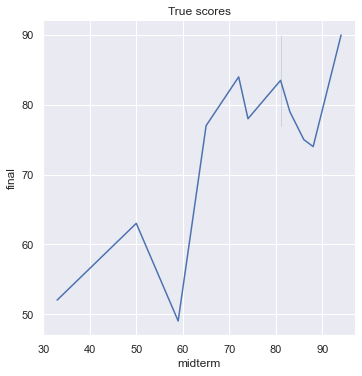

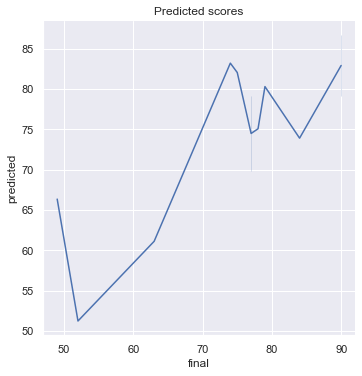

In [20]:
## With outlier
sns.relplot(data=exams_pred_df,
            x=exams_pred_df['midterm'],
            y=exams_pred_df['final'],
            kind='line').set(title='True scores');
sns.relplot(data=exams_pred_df,
            x=exams_pred_df['final'],
            y=exams_pred_df['predicted'],
            kind='line').set(title='Predicted scores');

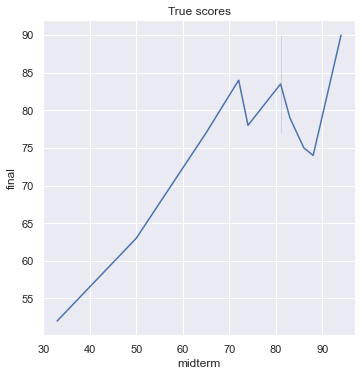

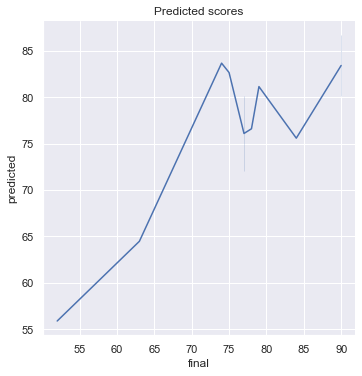

In [23]:
## Without Outiler
sns.relplot(data=exams_pred_df_no_out,
            x=exams_pred_df_no_out['midterm'],
            y=exams_pred_df_no_out['final'],
            kind='line').set(title='True scores');
sns.relplot(data=exams_pred_df_no_out,
            x=exams_pred_df_no_out['final'],
            y=exams_pred_df_no_out['predicted'],
            kind='line').set(title='Predicted scores');